In [1]:
import pandas as pd
import numpy as np

ETL datos

In [2]:
df = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/2445996?format=tab&gbrecs=true', delimiter='\t')

In [3]:
df.head()

,resID,atmilitary,atreligion,ated,atprof,atinc,atrace,atage,atmale,selected,rating
0,383,1,6,3,6,6,1,6,2,0,0.333333
1,383,2,1,1,4,3,6,4,1,1,0.500000
2,383,1,3,5,5,1,2,5,2,1,0.666667
3,383,2,4,5,3,2,1,6,1,0,0.666667
4,383,2,1,2,3,6,2,2,2,0,0.333333


Vamos a usar el metodo "Immigrant CONJOINT". este a la vez puede darse a través de dos metodos: choice-based conjoint (donde seleccionamos las columnas que se comportaran comoo target)y rating-based conjoint (donde el target será el ranking).

In [4]:
# chequemos nulos
df.isnull().sum()

resID          0
atmilitary     0
atreligion     0
ated           0
atprof         0
atinc          0
atrace         0
atage          0
atmale         0
selected       0
rating        10
dtype: int64

In [5]:
# quitamos nulos, ya que vemos que no son tantos
clean_df = df[~df.rating.isnull()]

ANALISIS

In [7]:
y = clean_df['selected']
y


0       0
1       1
2       1
3       0
4       0
       ..
3461    0
3462    0
3463    1
3464    1
3465    0
Name: selected, Length: 3456, dtype: int64

In [8]:
x = clean_df[[x for x in df.columns if x != 'selected' and x != 'resID' and x != 'rating']]
x
#selecciona todas las columnas menos si se trata de selected, resID o rating

,atmilitary,atreligion,ated,atprof,atinc,atrace,atage,atmale
0,1,6,3,6,6,1,6,2
1,2,1,1,4,3,6,4,1
2,1,3,5,5,1,2,5,2
3,2,4,5,3,2,1,6,1
4,2,1,2,3,6,2,2,2
...,...,...,...,...,...,...,...,...
3461,2,3,3,1,1,3,4,1
3462,1,2,6,3,2,5,4,1
3463,2,4,4,3,3,1,2,1
3464,2,6,3,1,5,4,2,1


In [9]:
xdum = pd.get_dummies(x, columns=[c for c in x.columns if c != 'selected'])
xdum.head()
#one hote encoding

,atmilitary_1,atmilitary_2,atreligion_1,atreligion_2,atreligion_3,atreligion_4,atreligion_5,atreligion_6,ated_1,ated_2,ated_3,ated_4,ated_5,ated_6,atprof_1,atprof_2,atprof_3,atprof_4,atprof_5,atprof_6,atinc_1,atinc_2,atinc_3,atinc_4,atinc_5,atinc_6,atrace_1,atrace_2,atrace_3,atrace_4,atrace_5,atrace_6,atage_1,atage_2,atage_3,atage_4,atage_5,atage_6,atmale_1,atmale_2
0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1


**Utility of an alternative U(x)**

es la sumatoria de:
  Sumatoria de u(ij) desde i=1 hasta m
  *
  Sumatoria de x(ij) dsede j=1 hasta k(i)


donde: 
  u(ij) es la contribución "part-worth" (utilidad del j-ésimo nivel del i-ésimo atributo)
  k(i) es el numero de niveles del atributo i
  m es el numero de atributos *texto en cursiva*

**Importancia de un atributo R(i)**

se define como:
  R(i) = max (u (ij)) - min (u(ij))

Donde R(i) es el i-ésimo atributo

**Importancia relativa de un atributo**

R imp = R(i) / Sumatoria de R(i) desde i=1 hasta m


En resumen "CONJOINT" analysis loq ue ahce es Regresión Lineal donde el objetivo puede ser bianrio (choicce-based) o 1-7 en al escala de likert (rating) o ranking.

In [10]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
res = sm.OLS(y, xdum, family=sm.families.Binomial()).fit()
res.summary()

#OLS: es un modelo de "least squares"
# el metodo "least squares" loq ue ahce es un analisis de regresion para determinar la recta que mejor se ajusta 
# para un set de datos, proveyendo una demostración visual de la relación entre los puntos del dataset.
# Cada punto representa la relación entre la conocida variable independiente y la desconocida variable dependiente 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               selected   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     10.72
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           7.39e-51
Time:                        14:29:06   Log-Likelihood:                -2343.3
No. Observations:                3456   AIC:                             4753.
Df Residuals:                    3423   BIC:                             4956.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
atmilitary_1     0.0808      0.008      9.585      0.000       0.064       0.097
atmilitary_2     0.1671      0.008     19.810      0.000       0.151       0.184
atreligion_1     0.0931      0.018      5.132      0.000       0.058       0.129
atreligion_2     0.0578      0.018      3.144      0.002       0.022       0.094
atreligion_3     0.0803      0.018      4.411      0.000       0.045       0.116
atreligion_4     0.0797      0.018      4.326      0.000       0.044       0.116
atreligion_5    -0.0218      0.018     -1.185      0.236      -0.058       0.014
atreligion_6    -0.0411      0.018     -2.256      0.024      -0.077      -0.005
ated_1          -0.1124      0.018     -6.115      0.000      -0.148      -0.076
ated_2           0.0278      0.019      1.464      0.143      -0.009       0.065
ated_3           0.0366      0.019      1.942      0.052      -0.000       0.074
ated_4           0.0737      0.018      4.076      0.000       0.038       0.109
ated_5           0.0649      0.018      3.570      0.000       0.029       0.101
ated_6           0.1572      0.018      8.949      0.000       0.123       0.192
atprof_1         0.1084      0.018      5.930      0.000       0.073       0.144
atprof_2         0.0852      0.019      4.597      0.000       0.049       0.122
atprof_3         0.0910      0.018      5.060      0.000       0.056       0.126
atprof_4         0.0674      0.018      3.716      0.000       0.032       0.103
atprof_5         0.0145      0.019      0.779      0.436      -0.022       0.051
atprof_6        -0.1186      0.018     -6.465      0.000      -0.155      -0.083
atinc_1          0.0081      0.018      0.448      0.654      -0.027       0.043
atinc_2          0.0316      0.019      1.662      0.097      -0.006       0.069
atinc_3          0.0716      0.018      4.020      0.000       0.037       0.106
atinc_4          0.0397      0.018      2.154      0.031       0.004       0.076
atinc_5          0.0808      0.018      4.451      0.000       0.045       0.116
atinc_6          0.0161      0.018      0.872      0.383      -0.020       0.052
atrace_1         0.0274      0.018      1.494      0.135      -0.009       0.063
atrace_2         0.0527      0.018      2.881      0.004       0.017       0.089
atrace_3         0.0633      0.018      3.556      0.000       0.028       0.098
atrace_4         0.0037      0.019      0.198      0.843      -0.033       0.040
atrace_5         0.0324      0.018      1.787      0.074      -0.003       0.068
atrace_6         0.0683      0.019      3.687      0.000       0.032       0.105
atage_1          0.0680      0.018      3.770      0.000       0.033       0.103
atage_2          0.0934      0.019      4.957      0.000       0.056       0.130
atage_3          0.0900      0.018      4.967      0.000       0.054       0.125
atage

In [12]:
df_res = pd.DataFrame({ #creamos un data frame
    'param_name': res.params.keys() #usamos el mismo indice que "res" (generadoe en el codigo anterior)
    , 'param_w': res.params.values #tomamos los valores de la columna coef de "res"
    , 'pval': res.pvalues #tomamos los valores de la columna P>t
})
df_res

,param_name,param_w,pval
atmilitary_1,atmilitary_1,0.080778,1.711435e-21
atmilitary_2,atmilitary_2,0.167102,9.017199e-83
atreligion_1,atreligion_1,0.093108,3.028118e-07
atreligion_2,atreligion_2,0.057763,1.682251e-03
atreligion_3,atreligion_3,0.080263,1.061895e-05
atreligion_4,atreligion_4,0.079709,1.562473e-05
atreligion_5,atreligion_5,-0.021830,2.359818e-01
atreligion_6,atreligion_6,-0.041133,2.413166e-02
ated_1,ated_1,-0.112386,1.071760e-09
ated_2,ated_2,0.027786,1.432715e-01


In [13]:
# añadimos una columna con los valores absolutos de param_w de df_res
df_res['abs_param_w'] = np.abs(df_res['param_w'])
df_res

,param_name,param_w,pval,abs_param_w
atmilitary_1,atmilitary_1,0.080778,1.711435e-21,0.080778
atmilitary_2,atmilitary_2,0.167102,9.017199e-83,0.167102
atreligion_1,atreligion_1,0.093108,3.028118e-07,0.093108
atreligion_2,atreligion_2,0.057763,1.682251e-03,0.057763
atreligion_3,atreligion_3,0.080263,1.061895e-05,0.080263
atreligion_4,atreligion_4,0.079709,1.562473e-05,0.079709
atreligion_5,atreligion_5,-0.021830,2.359818e-01,0.021830
atreligion_6,atreligion_6,-0.041133,2.413166e-02,0.041133
ated_1,ated_1,-0.112386,1.071760e-09,0.112386
ated_2,ated_2,0.027786,1.432715e-01,0.027786


In [14]:
# marcamos las observaciones con significancia debajo del 95% del intervalo de confianza
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
df_res

,param_name,param_w,pval,abs_param_w,is_sig_95
atmilitary_1,atmilitary_1,0.080778,1.711435e-21,0.080778,True
atmilitary_2,atmilitary_2,0.167102,9.017199e-83,0.167102,True
atreligion_1,atreligion_1,0.093108,3.028118e-07,0.093108,True
atreligion_2,atreligion_2,0.057763,1.682251e-03,0.057763,True
atreligion_3,atreligion_3,0.080263,1.061895e-05,0.080263,True
atreligion_4,atreligion_4,0.079709,1.562473e-05,0.079709,True
atreligion_5,atreligion_5,-0.021830,2.359818e-01,0.021830,False
atreligion_6,atreligion_6,-0.041133,2.413166e-02,0.041133,True
ated_1,ated_1,-0.112386,1.071760e-09,0.112386,True
ated_2,ated_2,0.027786,1.432715e-01,0.027786,False


In [15]:
# creamos una columna dnode todos los valores seran azules, menos si son FALSE que seran rojas
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]
df_res

,param_name,param_w,pval,abs_param_w,is_sig_95,c
atmilitary_1,atmilitary_1,0.080778,1.711435e-21,0.080778,True,blue
atmilitary_2,atmilitary_2,0.167102,9.017199e-83,0.167102,True,blue
atreligion_1,atreligion_1,0.093108,3.028118e-07,0.093108,True,blue
atreligion_2,atreligion_2,0.057763,1.682251e-03,0.057763,True,blue
atreligion_3,atreligion_3,0.080263,1.061895e-05,0.080263,True,blue
atreligion_4,atreligion_4,0.079709,1.562473e-05,0.079709,True,blue
atreligion_5,atreligion_5,-0.021830,2.359818e-01,0.021830,False,red
atreligion_6,atreligion_6,-0.041133,2.413166e-02,0.041133,True,blue
ated_1,ated_1,-0.112386,1.071760e-09,0.112386,True,blue
ated_2,ated_2,0.027786,1.432715e-01,0.027786,False,red


In [17]:
# ordenamos de menor a mayor mediante abs parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)
df_res

,param_name,param_w,pval,abs_param_w,is_sig_95,c
atrace_4,atrace_4,0.003716,8.428776e-01,0.003716,False,red
atage_5,atage_5,0.003771,8.348855e-01,0.003771,False,red
atinc_1,atinc_1,0.008084,6.540960e-01,0.008084,False,red
atprof_5,atprof_5,0.014509,4.359223e-01,0.014509,False,red
atinc_6,atinc_6,0.016107,3.832526e-01,0.016107,False,red
atreligion_5,atreligion_5,-0.021830,2.359818e-01,0.021830,False,red
atrace_1,atrace_1,0.027432,1.351711e-01,0.027432,False,red
ated_2,ated_2,0.027786,1.432715e-01,0.027786,False,red
atinc_2,atinc_2,0.031641,9.668298e-02,0.031641,False,red
atrace_5,atrace_5,0.032412,7.394669e-02,0.032412,False,red


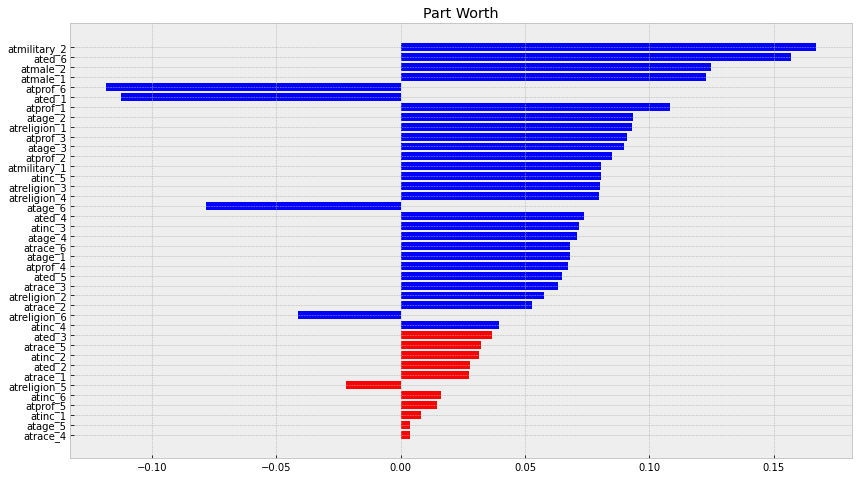

In [20]:
f, ax = plt.subplots(figsize=(14, 8)) #seteamos el tamaño del grafico
plt.title('Part Worth') #titulo del plot
pwu = df_res['param_w'] #definimos variable pwu
xbar = np.arange(len(pwu)) #definimos xbar mediante arange (devuelve valores espaciados pudiendo indicar comienzo, fin y distancia entre valores) del mismo tamaño que pwu
plt.barh(xbar, pwu, color=df_res['c'])#hace un plot horizontalxon los valores de xbar y de pwu con los colores definidos en df_res[c]
plt.yticks(xbar, labels=df_res['param_name']) #establecemos las ubicaciones y/o etiquetas del eje y
plt.show()

Importancia de los atributos:
la suma de importancia de atributos se aproximara a la escala de la varaible target:
  si es choice-based sera cercana a 1
  si es likert scale sera igual a 7

In [32]:
feature = sk[0]
feature

'atmale'

In [37]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict() #creamos un diccionario (similar a una lista)

for key, coeff in res.params.items(): #params devuelve las etiquetas de las columnas
#                                     #items devuelve el indice y su valor
    sk =  key.split('_') #como hicimos one hot encoding cada atrabibuto tiene mas de una opción por ej: atreligion_5
#                        #los valores key o indices lo sepramos de lo que sigue despues del guion bajo "_"
    feature = sk[0] #seteamos feature en 0
    if len(sk) == 1: #si el tamaño de sk es 1 entonces usamos el indice "key"
        feature = key
    if feature not in range_per_feature: #si a feature no se le asigna valor hacemos una lista
        range_per_feature[feature] = list()
       
    range_per_feature[feature].append(coeff) #agrega al final del feature los coeficientes correspondientes para cada indice

range_per_feature
#tenemos para cada varaible (age,ed,inc, etc.) el valor de coeficiente en un diccionario o lista

{'atage': [0.06801254005317439,
  0.09336631063158561,
  0.08996814241507098,
  0.07110273169039363,
  0.0037709231787387857,
  -0.0783412339962679],
 'ated': [-0.11238618810208786,
  0.027785704512644886,
  0.03663790058556883,
  0.07371695118240867,
  0.06492125765872256,
  0.15720378813543837],
 'atinc': [0.008084423908784753,
  0.03164072441128594,
  0.07156996334780603,
  0.03970814422547982,
  0.08076936949423114,
  0.016106788585108226],
 'atmale': [0.1228418895941067, 0.12503752437858923],
 'atmilitary': [0.08077789355533954, 0.16710152041735615],
 'atprof': [0.1084337390882442,
  0.08518688041222024,
  0.09097488541718701,
  0.06739496328170552,
  0.014508571267307802,
  -0.11861962549396912],
 'atrace': [0.027431869305806683,
  0.052747314657724274,
  0.06330001526402099,
  0.0037162696510110726,
  0.03241171654839119,
  0.06827222854574151],
 'atreligion': [0.09310813961389783,
  0.05776274070431532,
  0.08026256615753832,
  0.07970921833086933,
  -0.02182981507263942,
  -0.

In [38]:
# la importancia para cada feature es el rango del coeficiente correspondiente a cada feature
# es decir para cada feature su valor max menos su min
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}
importance_per_feature

{'atage': 0.1717075446278535,
 'ated': 0.26958997623752623,
 'atinc': 0.07268494558544639,
 'atmale': 0.0021956347844825225,
 'atmilitary': 0.08632362686201661,
 'atprof': 0.2270533645822133,
 'atrace': 0.06455595889473044,
 'atreligion': 0.1342415753751834}

In [39]:
# computaamos la importancia relativa por feature 
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
total_feature_importance
#es la suma de todoas las importancias

1.0283526269494523

In [42]:
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}
#para cada item de importance_per_feature:
#se lo divide por la sumatoria de toas las importancias (total_feature_importance)
# se lo multiplica por 100 y se lo redondea con 3 decimaales
#por ejemplo: para "atage"
  # 100 * (0.1717075446278535/1.0283526269494523) = 16.7

In [43]:
relative_importance_per_feature

{'atage': 16.7,
 'ated': 26.200000000000003,
 'atinc': 7.1,
 'atmale': 0.2,
 'atmilitary': 8.4,
 'atprof': 22.1,
 'atrace': 6.3,
 'atreligion': 13.100000000000001}

In [44]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), #lista con los nombres y valores de las varaible
    columns=['attr', 'importance'] #nombramos a las columnas
).sort_values(by='importance', ascending=False) #ordenamos valores de forma ascendente por importancia

alt_data

,attr,importance
2,ated,0.269590
3,atprof,0.227053
6,atage,0.171708
1,atreligion,0.134242
0,atmilitary,0.086324
4,atinc,0.072685
5,atrace,0.064556
7,atmale,0.002196


<BarContainer object of 8 artists>

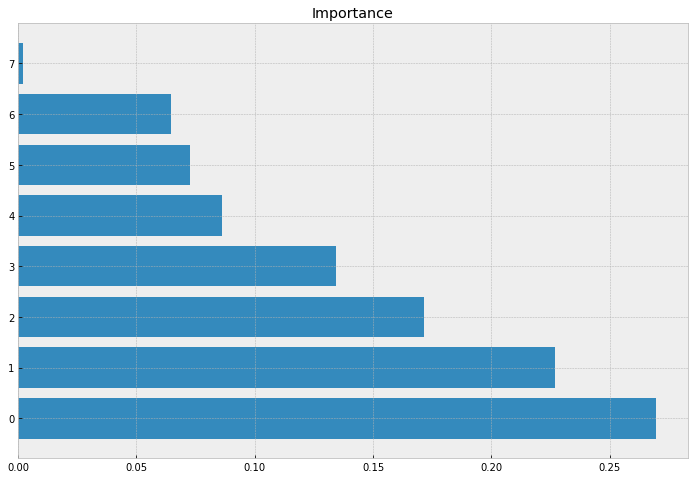

In [45]:
f, ax = plt.subplots(figsize=(12, 8)) #seteamos tamaño del plot
xbar = np.arange(len(alt_data['attr'])) #aramos arange de misa longitud que "attr"
plt.title('Importance') #seteamos titulo
plt.barh(xbar, alt_data['importance']) #hace un plot horizontal con los valores de xbar y de alt_data

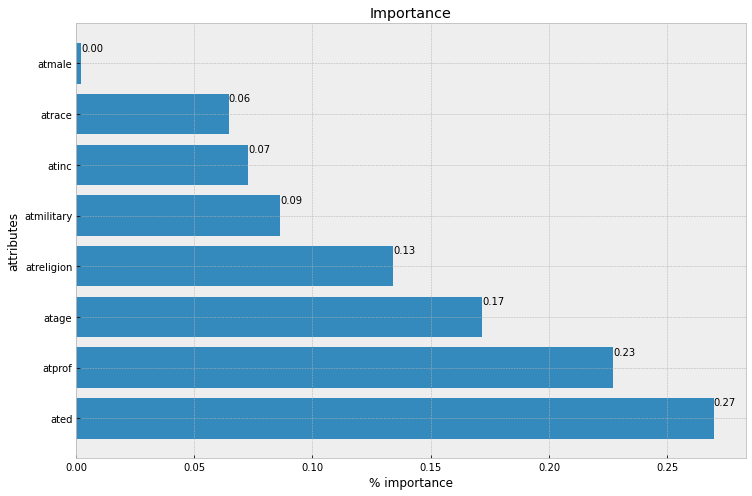

In [48]:
f, ax = plt.subplots(figsize=(12, 8)) #seteamos tamaño del plot
xbar = np.arange(len(alt_data['attr'])) #aramos arange de misa longitud que "attr"
plt.title('Importance') #seteamos titulo
plt.barh(xbar, alt_data['importance']) #hace un plot horizontal con los valores de xbar y de alt_data
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes') #nombre del eje "Y"
plt.xlabel('% importance') #nombre del eje "X"
plt.yticks(xbar, alt_data['attr']) #etiquetamos con los valores de "attr"
plt.show()

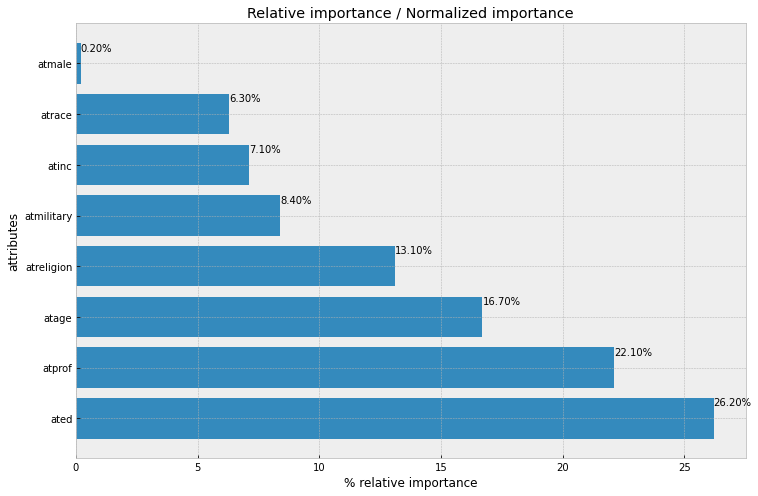

In [52]:
#idem anterior pero con la normalizada
alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()), 
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()